In [54]:
import fastbook
fastbook.setup_book()

In [56]:
fastbook.setup_book?

Signature: fastbook.setup_book()
Docstring: <no docstring>
File:      /opt/conda/lib/python3.6/site-packages/fastbook/__init__.py
Type:      function


In [3]:
from fastai.vision.widgets import *

In [10]:
path = Path('./bears')
path

Path('bears')

In [11]:
fns = get_image_files(path)
fns

(#2251) [Path('bears/grizzly/a8edf20f54c34115a65e3e36e9804eb1.jpg'),Path('bears/grizzly/0da92cca90f44ecb800959b7d606f426.jpg'),Path('bears/grizzly/015b7cdc30bd44219d2f54e21155e98d.jpg'),Path('bears/grizzly/f660dfb058224bea803899e265debf00.jpg'),Path('bears/grizzly/5d341e02e2d84a97a37787a3d2c62399.jpg'),Path('bears/grizzly/ed382906a5664fa58a82dc89ed12a484.jpg'),Path('bears/grizzly/14c2715c849745e9b07bf3e68073f696.jpg'),Path('bears/grizzly/7943c88dfcde4c2aa114520900e68a4f.jpg'),Path('bears/grizzly/78e8f3867b9045b185283fbe6fc013da.jpg'),Path('bears/grizzly/7b89b510c4764e9792e4ccbe20672c47.jpg')...]

In [12]:
failed = verify_images(fns)
failed

(#119) [Path('bears/grizzly/a993fa1766c549c89933883f3f3635e8.jpg'),Path('bears/grizzly/285437747ed24363b20a140dc07daaf0.jpg'),Path('bears/grizzly/84207a88424a43d8bf164eac4d67b0b3.jpg'),Path('bears/grizzly/9d61b23bd7ef4cc58de1d82c44618256.jpg'),Path('bears/grizzly/87147d0b179b418289eeed48d747c90d.jpg'),Path('bears/grizzly/3cbc382135894d5ebd83a5ee085b2088.jpg'),Path('bears/grizzly/048783fa860f40009276dcede7c485ed.jpg'),Path('bears/grizzly/7640b49377564ae6b61323375e7a2f1f.jpg'),Path('bears/grizzly/915f61ec3b1b4869804c4fde672fc763.jpg'),Path('bears/grizzly/9fb8b335a8fa47adb8425cf81d165138.jpg')...]

In [17]:
failed.map(Path.unlink)

(#119) [None,None,None,None,None,None,None,None,None,None...]

In [21]:
get_image_files??

Signature: get_image_files(path, recurse=True, folders=None)
Source:   
def get_image_files(path, recurse=True, folders=None):
    "Get image files in `path` recursively, only in `folders`, if specified."
    return get_files(path, extensions=image_extensions, recurse=recurse, folders=folders)
File:      /opt/conda/lib/python3.6/site-packages/fastai/data/transforms.py
Type:      function


In [20]:
parent_label?

Signature: parent_label(o)
Docstring: Label `item` with the parent folder name.
File:      /opt/conda/lib/python3.6/site-packages/fastai/data/transforms.py
Type:      function


In [22]:
DataBlock?

Init signature:
DataBlock(
    blocks=None,
    dl_type=None,
    getters=None,
    n_inp=None,
    item_tfms=None,
    batch_tfms=None,
    *,
    get_items=None,
    splitter=None,
    get_y=None,
    get_x=None,
)
Docstring:      Generic container to quickly build `Datasets` and `DataLoaders`
File:           /opt/conda/lib/python3.6/site-packages/fastai/data/block.py
Type:           type
Subclasses:     


In [27]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128),
)

In [28]:
dls = bears.dataloaders(path)

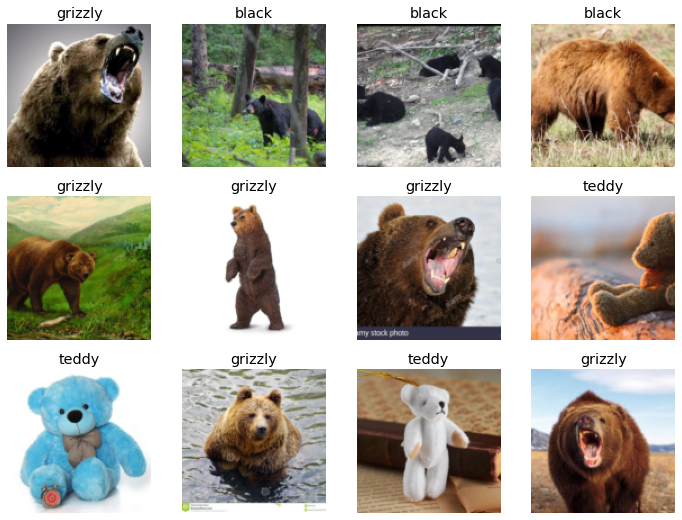

In [31]:
dls.valid.show_batch(max_n=12, nrows=3)

In [32]:
Resize?

Init signature:
Resize(
    self,
    size,
    method='crop',
    pad_mode='reflection',
    resamples=(2, 0),
    **kwargs,
)
Docstring:      A transform that before_call its state at each `__call__`
File:           /opt/conda/lib/python3.6/site-packages/fastai/vision/augment.py
Type:           _TfmMeta
Subclasses:     


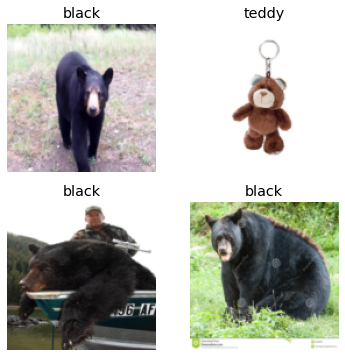

In [35]:
bears_squish = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls_squish = bears_squish.dataloaders(path)
dls_squish.valid.show_batch(max_n=4)
                         

In [36]:
dls

In [38]:
bears_final = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = bears_final.dataloaders(path)

In [40]:
error_rate?

Signature: error_rate(inp, targ, axis=-1)
Docstring: 1 - `accuracy`
File:      /opt/conda/lib/python3.6/site-packages/fastai/metrics.py
Type:      function


In [42]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.681839,0.530220,0.173709,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.283459,0.387026,0.145540,00:11
1,0.216564,0.405825,0.138498,00:11
2,0.173093,0.414167,0.145540,00:11
3,0.125582,0.341662,0.131455,00:11


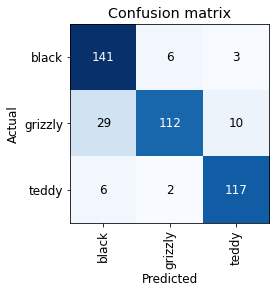

In [44]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

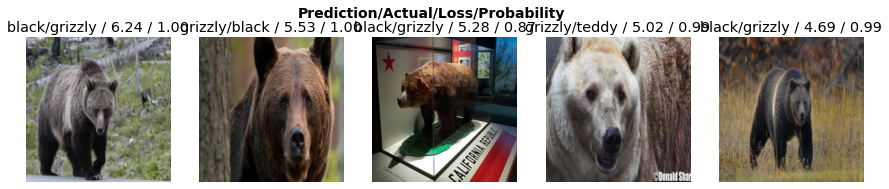

In [48]:
interp.plot_top_losses(5, nrows=1)

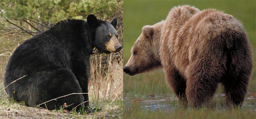

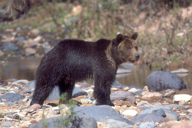

In [55]:
cleaner = ImageClassifierCleaner(learn, max_n=2)
cleaner

In [52]:
ImageClassifierCleaner?

Init signature: ImageClassifierCleaner(learn, opts=(), height=128, width=256, max_n=30)
Docstring:      A widget that provides an `ImagesCleaner` with a CNN `Learner`
File:           /opt/conda/lib/python3.6/site-packages/fastai/vision/widgets.py
Type:           type
Subclasses:     


In [59]:
learn.export('bears.pkl')

In [62]:
learn2 = load_learner('bears.pkl')

In [64]:
fns[5]

Path('bears/grizzly/ed382906a5664fa58a82dc89ed12a484.jpg')

In [67]:
learn2.predict(fns[70])

('black', tensor(0), tensor([0.4642, 0.4033, 0.1325]))

In [69]:
learn2.dls.vocab

['black', 'grizzly', 'teddy']